This one has scans over ALL params

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [2]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_1000_MICRO_SCAN_NTv491_HBv431_HSv140_all_smallAlambdaMuEff_largeTanBeta_04_May_16_0005.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

In [4]:
store.close()

In [32]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [33]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [34]:
print 'relaxed constraints:', len(df_pass_all.index) 
print 'With ma1 < 10.5:', len(df_pass_all_ma1.index)


relaxed constraints: 34473
With ma1 < 10.5: 722


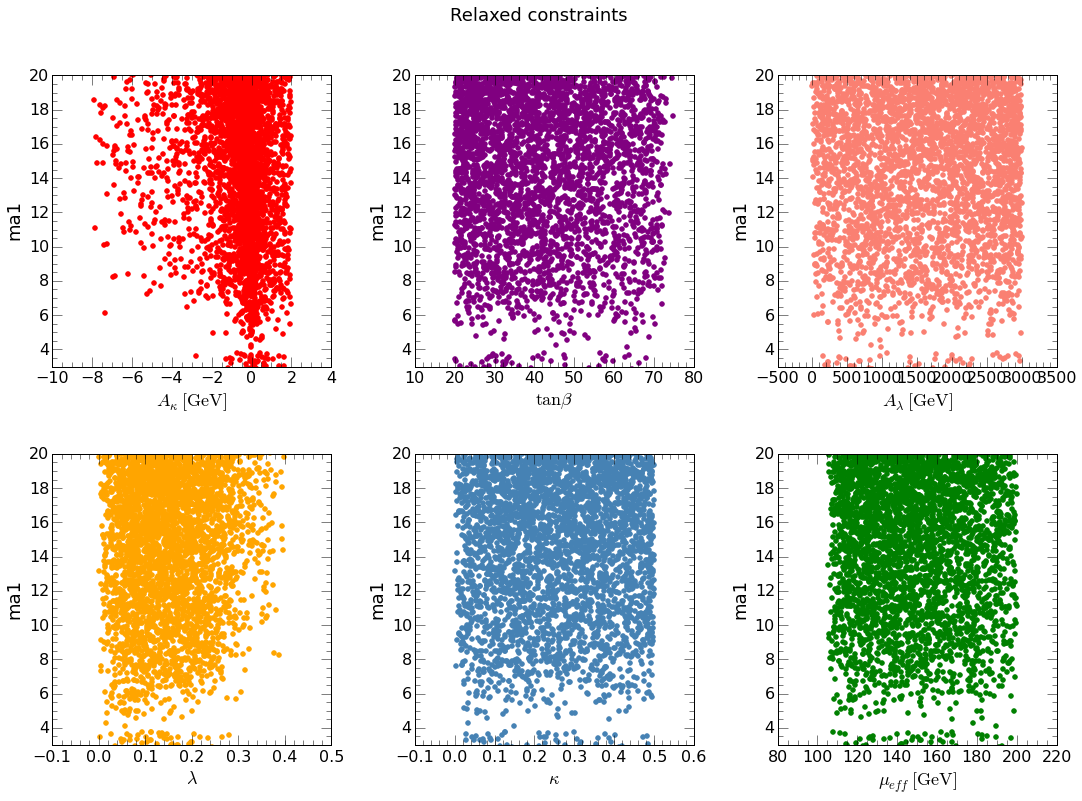

In [35]:
plot_input_params_scatters(df_pass_all, 'ma1', 'ma1', yrange=[3, 20], title='Relaxed constraints')

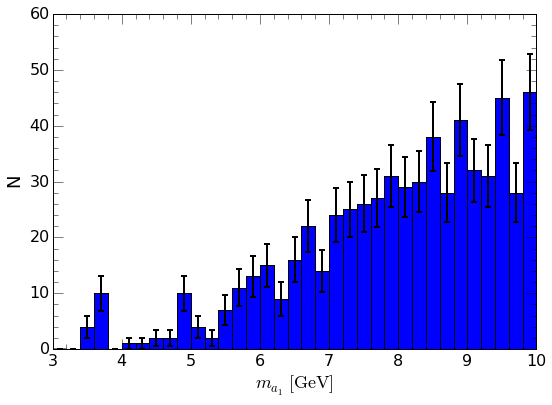

In [36]:
_ = plot_histogram(df=df_pass_all_ma1, var='ma1', range=[3, 10], bins=35, xlabel=r'$m_{a_1}\mathrm{\ [GeV]}$')

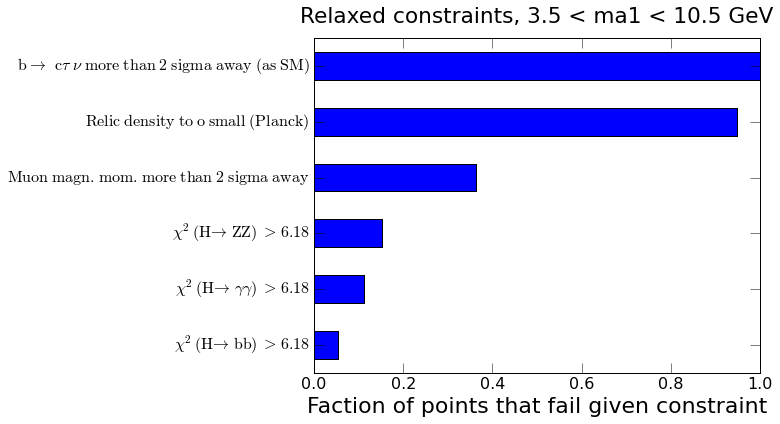

In [37]:
plot_constraints(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV')

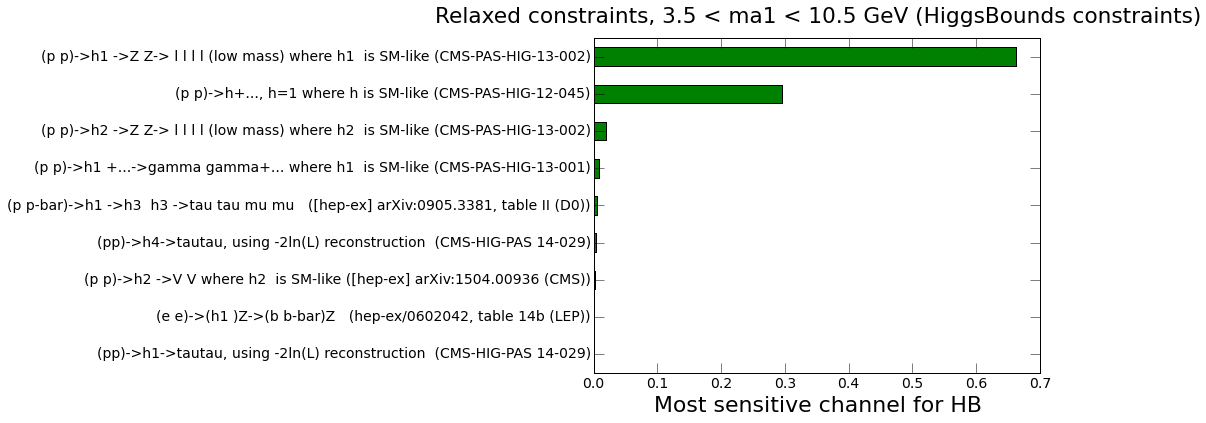

In [38]:
plot_constraints_HB(df_pass_all_ma1, 'Relaxed constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

In [39]:
# We need to divide up the dataset into several groupings:
# - pass NT chi2 or fail
# - pass HS chi2 or fail
# - pass HB or fail

fail_NT_chi2 = df_pass_all.constraints.str.contains('chi2')
pass_NT_chi2 = ~ fail_NT_chi2

fail_HS = df_pass_all.HSprob < 0.05
pass_HS = ~fail_HS

fail_HB = df_pass_all.HBresult == 0
pass_HB = ~fail_HB

In [40]:
pass_gm2 = ~df_pass_all.constraints.str.contains('Muon')
pass_relic = ~df_pass_all.constraints.str.contains('Relic')

In [41]:
df_fail_NT_fail_HS_fail_HB = df_pass_all[fail_NT_chi2 & fail_HS & fail_HB]
df_fail_NT_fail_HS_pass_HB = df_pass_all[fail_NT_chi2 & fail_HS & pass_HB]

df_fail_NT_pass_HS_fail_HB = df_pass_all[fail_NT_chi2 & pass_HS & fail_HB]
df_fail_NT_pass_HS_pass_HB = df_pass_all[fail_NT_chi2 & pass_HS & pass_HB]

df_pass_NT_pass_HS_fail_HB = df_pass_all[pass_NT_chi2 & pass_HS & fail_HB]
df_pass_NT_pass_HS_pass_HB = df_pass_all[pass_NT_chi2 & pass_HS & pass_HB]
df_pass_NT_fail_HS_fail_HB = df_pass_all[pass_NT_chi2 & fail_HS & fail_HB]
df_pass_NT_fail_HS_pass_HB = df_pass_all[pass_NT_chi2 & fail_HS & pass_HB]

In [42]:
print 'Fail NT, fail HS, fail HB:', len(df_fail_NT_fail_HS_fail_HB.index)
print 'Fail NT, fail HS, pass HB:', len(df_fail_NT_fail_HS_pass_HB.index)
print 'Fail NT, pass HS, fail HB:', len(df_fail_NT_pass_HS_fail_HB.index)
print 'Fail NT, pass HS, pass HB:', len(df_fail_NT_pass_HS_pass_HB.index)
print 'Pass NT, pass HS, fail HB:', len(df_pass_NT_pass_HS_fail_HB.index)
print 'Pass NT, pass HS, pass HB:', len(df_pass_NT_pass_HS_pass_HB.index)
print 'Pass NT, fail HS, fail HB:', len(df_pass_NT_fail_HS_fail_HB.index)
print 'Pass NT, fail HS, pass HB:', len(df_pass_NT_fail_HS_pass_HB.index)

Fail NT, fail HS, fail HB: 10
Fail NT, fail HS, pass HB: 4046
Fail NT, pass HS, fail HB: 0
Fail NT, pass HS, pass HB: 951
Pass NT, pass HS, fail HB: 3
Pass NT, pass HS, pass HB: 11556
Pass NT, fail HS, fail HB: 344
Pass NT, fail HS, pass HB: 17563


In [43]:
df_fail_NT_fail_HS_fail_HB.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma', 'Brh1zz',
       'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma', 'Brh2gg',
       'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma', 'Brh2zz',
       'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult', 'HSchi2',
       'HSnobs', 'HSprob', 'a1bbrc2', 'a1ggrc2', 'a1tautaurc2', 'ad3',
       'ae2', 'ae3', 'akappa', 'alambda', 'au3', 'bsgamma', 'bsmumu',
       'btaunu', 'constraints', 'delmd', 'delms', 'file', 'h1bbrc2',
       'h1ggrc2', 'h1vvrc2', 'h2bbrc2', 'h2ggrc2', 'h2vvrc2', 'h3bbrc2',
       'h3ggrc2', 'h3vvrc2', 'kappa', 'lambda_', 'm1', 'm2', 'm3', 'ma1',
       'ma2', 'md2', 'md3', 'me2', 'me3', 'mh1', 'mh2', 'mh3', 'mhc',
       'ml2', 'ml3', 'mq2', 'mq3', 'msbottom1', 'msbottom2', 'mstop1',
       'mstop2', 'mu2', 'mu3', 'mueff', 'omega', 'rd', 'rds', 'tgbeta',
       'mass_ind_h1',

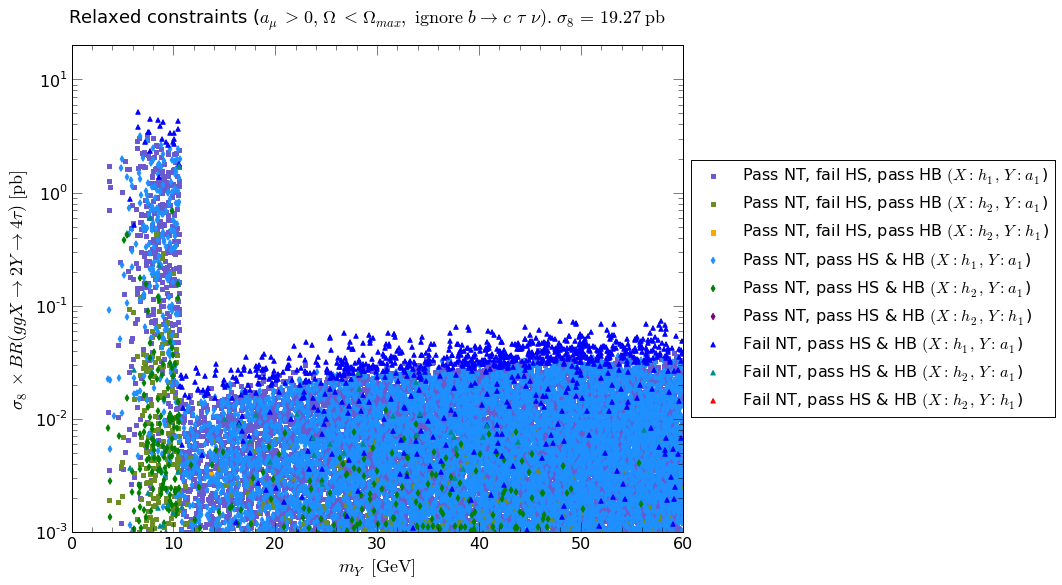

In [44]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])


# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Fail NT, fail HS, pass HB ' + lab_h1a1, 
#                  color='slateblue', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Fail NT, fail HS, pass HB ' + lab_h2a1, 
#                  color='olivedrab', marker='o')
# _ = plot_scatter(ax=plt.gca(), df=df_fail_NT_fail_HS_pass_HB, 
#                  xvar='ma1', yvar=xsec_h2h1, label='Fail NT, fail HS, pass HB ' + lab_h2h1, 
#                  color='orange', marker='o')


_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS, pass HB ' + lab_h1a1, 
                 color='slateblue', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS, pass HB ' + lab_h2a1, 
                 color='olivedrab', marker='s')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2h1, label='Pass NT, fail HS, pass HB ' + lab_h2h1, 
                 color='orange', marker='s')

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
#                  color='cyan', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
#                  color='lime', marker='v')
# _ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
#                  xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
#                  color='magenta', marker='v')



box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', fontsize=16, framealpha=0.95, bbox_to_anchor=(1, 0.5))
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 20)
plt.xlim(0, 60)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

(<matplotlib.axes._subplots.AxesSubplot at 0x122343e50>,
 <matplotlib.collections.PathCollection at 0x121cbba10>)

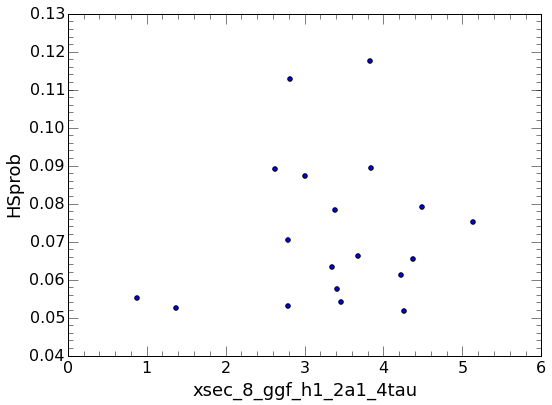

In [45]:
plot_scatter(df=df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>0.1 & HSprob<0.2'), xvar='xsec_8_ggf_h1_2a1_4tau', yvar='HSprob')

In [46]:
df_fail_NT_pass_HS_pass_HB.query('xsec_8_ggf_h1_2a1_4tau>0.1 & HSprob<0.2')

,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,Brh1gammagamma,Brh1gg,Brh1tautau,Brh1ww,Brh1zgamma,Brh1zz,Brh2a1a1,Brh2a1z,Brh2bb,Brh2gammagamma,Brh2gg,Brh2h1h1,Brh2tautau,Brh2ww,Brh2zgamma,Brh2zz,Del_a_mu,HBchannel,HBobsratio,HBresult,HSchi2,HSnobs,HSprob,a1bbrc2,a1ggrc2,a1tautaurc2,ad3,ae2,ae3,akappa,alambda,au3,bsgamma,bsmumu,btaunu,constraints,delmd,delms,file,h1bbrc2,h1ggrc2,h1vvrc2,h2bbrc2,h2ggrc2,h2vvrc2,h3bbrc2,h3ggrc2,h3vvrc2,kappa,lambda_,m1,m2,m3,ma1,ma2,md2,md3,me2,me3,mh1,mh2,mh3,mhc,ml2,ml3,mq2,mq3,msbottom1,msbottom2,mstop1,mstop2,mu2,mu3,mueff,omega,rd,rds,tgbeta,mass_ind_h1,mass_ind_h2,mass_ind_h3,xsec_ggf13_h1,xsec_ggf13_h2,xsec_ggf13_h3,xsec_vbf13_h1,xsec_vbf13_h2,xsec_vbf13_h3,xsec_ggf8_h1,xsec_ggf8_h2,xsec_ggf8_h3,xsec_vbf8_h1,xsec_vbf8_h2,xsec_vbf8_h3,xsec_scaled_ggf_h1_2a1_4tau,xsec_13_ggf_h1_2a1_4tau,xsec_8_ggf_h1_2a1_4tau,xsec_scaled_ggf_h1_2a1_2b2tau,xsec_13_ggf_h1_2a1_2b2tau,xsec_8_ggf_h1_2a1_2b2tau,xsec_scaled_ggf_h1_2a1_4b,xsec_13_ggf_h1_2a1_4b,xsec_8_ggf_h1_2a1_4b,xsec_scaled_ggf_h2_2a1_4tau,xsec_13_ggf_h2_2a1_4tau,xsec_8_ggf_h2_2a1_4tau,xsec_scaled_ggf_h2_2a1_2b2tau,xsec_13_ggf_h2_2a1_2b2tau,xsec_8_ggf_h2_2a1_2b2tau,xsec_scaled_ggf_h2_2a1_4b,xsec_13_ggf_h2_2a1_4b,xsec_8_ggf_h2_2a1_4b,xsec_scaled_ggf_h2_2h1_4tau,xsec_13_ggf_h2_2h1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_scaled_ggf_h2_2h1_2b2tau,xsec_13_ggf_h2_2h1_2b2tau,xsec_8_ggf_h2_2h1_2b2tau,xsec_scaled_ggf_h2_2h1_4b,xsec_13_ggf_h2_2h1_4b,xsec_8_ggf_h2_2h1_4b,xsec_scaled_vbf_h1_2a1_4tau,xsec_13_vbf_h1_2a1_4tau,xsec_8_vbf_h1_2a1_4tau,xsec_scaled_vbf_h1_2a1_2b2tau,xsec_13_vbf_h1_2a1_2b2tau,xsec_8_vbf_h1_2a1_2b2tau,xsec_scaled_vbf_h1_2a1_4b,xsec_13_vbf_h1_2a1_4b,xsec_8_vbf_h1_2a1_4b,xsec_scaled_vbf_h2_2a1_4tau,xsec_13_vbf_h2_2a1_4tau,xsec_8_vbf_h2_2a1_4tau,xsec_scaled_vbf_h2_2a1_2b2tau,xsec_13_vbf_h2_2a1_2b2tau,xsec_8_vbf_h2_2a1_2b2tau,xsec_scaled_vbf_h2_2a1_4b,xsec_13_vbf_h2_2a1_4b,xsec_8_vbf_h2_2a1_4b,xsec_scaled_vbf_h2_2h1_4tau,xsec_13_vbf_h2_2h1_4tau,xsec_8_vbf_h2_2h1_4tau,xsec_scaled_vbf_h2_2h1_2b2tau,xsec_13_vbf_h2_2h1_2b2tau,xsec_8_vbf_h2_2h1_2b2tau,xsec_scaled_vbf_h2_2h1_4b,xsec_13_vbf_h2_2h1_4b,xsec_8_vbf_h2_2h1_4b
46038,NaN,0.013085,0.116310,0.003298,0.012632,0.854649,0.219535,3.874805e-13,0.473946,0.022109,0.001912,0.044841,0.051940,0.165512,0.001307,0.018364,0.732833,3.414781e-08,0.000279,1.704432e-06,6.764673e-06,0.005555,0.000046,0.010459,1.168443e-06,0.005043,2.236578e-10,539.0,0.442873,1.0,107.627849,89,0.087171,0.013803,0.016958,0.016077,2037.387310,826.571165,2001.082580,-0.406851,1847.720650,2890.75094,0.000419,3.275389e-09,0.000106,Relic density too small (Planck)|Muon magn. mom. more than 2 sigma away|chi2(H->ZZ) > 6.18|b -> c tau nu more than 2...,0.506364,17.865245,jobs_1000_MICRO_SCAN_NTv491_HBv431_HSv140_all_smallAlambdaMuEff_largeTanBeta_04_May_16_0005/spectr_PROTO_all_2912.dat,1.001980,0.982926,0.999625,0.060996,3.604720e-04,3.754360e-04,780.419,0.008887,3.998650e-08,0.338265,0.194687,192.482889,592.284730,1167.804220,8.853606,3158.14109,2060.260520,938.704777,1139.553220,1411.610910,125.618151,550.996478,3158.22905,3159.15790,1993.662340,1647.255910,1092.23599,1058.48831,1021.353520,1109.90324,1035.704580,1568.42379,1960.488360,1551.749820,159.310830,0.014352,0.297291,0.252020,30.153283,107,284,284,43.065072,0.003489,0.086025,2.866859,2.067190e-04,2.201698e-08,18.734570,0.001053,0.025959,1.569411,9.547337e-05,1.016857e-08,0.160354,6.905636,3.004154,NaN,NaN,NaN,NaN,NaN,NaN,0.535279,0.001868,5.636158e-04,NaN,NaN,NaN,NaN,NaN,NaN,1.498616e-05,5.229208e-08,1.577951e-08,2.734960e-04,9.543254e-07,2.879745e-07,0.001248,4.354087e-06,1.313877e-06,0.160354,0.459711,0.251661,NaN,NaN,NaN,NaN,NaN,NaN,0.535279,1.106523e-04,5.110488e-05,NaN,NaN,NaN,NaN,NaN,NaN,1.498616e-05,3.097923e-09,1.430779e-09,2.734960e-04,5.653680e-08,2.611158e-08,0.001248,2.579478e-07,1.191335e-07
88531,NaN,0.010680,0.096402,0.003406,0.013231,0.876265,0.683603,2.116615e-12,0.242921,0.014004,0.000768,0.021455,0.025162,0.004463,0.000042,0.

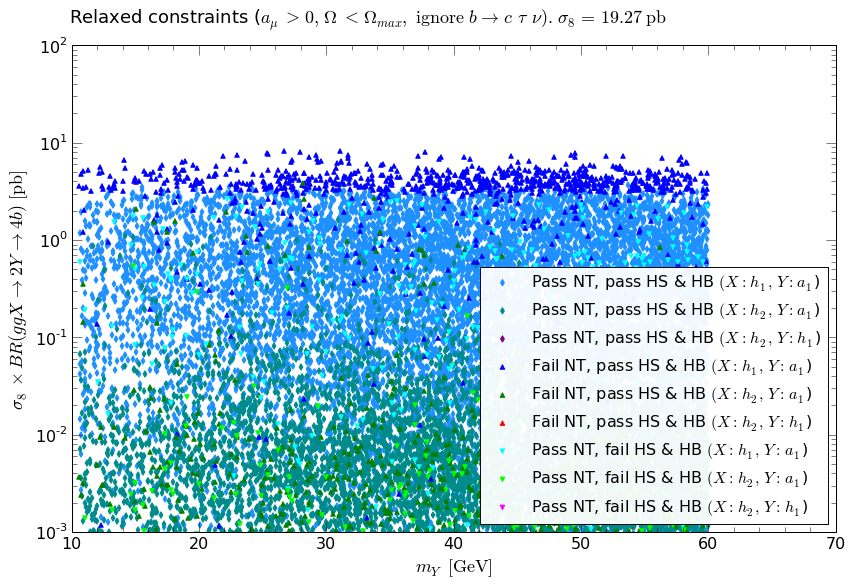

In [47]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_4b' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_4b' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_4b' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 4b)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 100)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

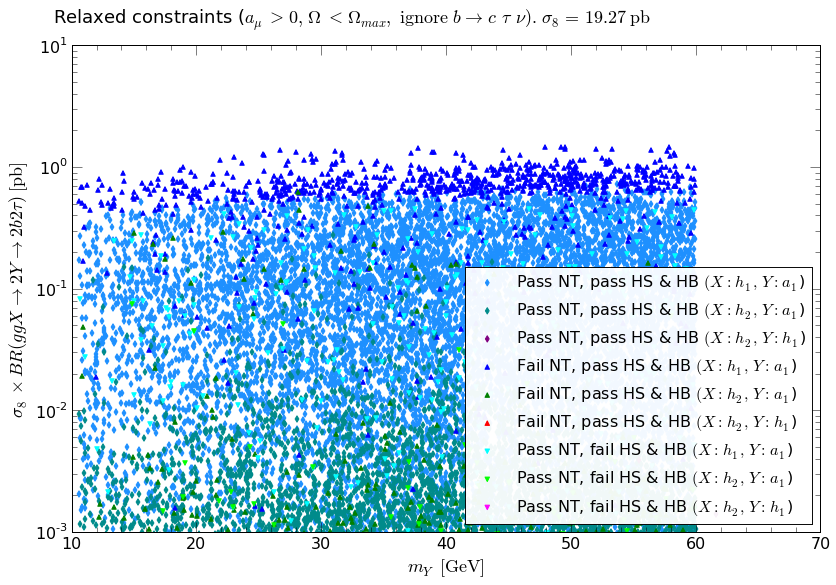

In [48]:
xsec_h1a1 = 'xsec_8_ggf_h1_2a1_2b2tau' 
xsec_h2a1 = 'xsec_8_ggf_h2_2a1_2b2tau' 
xsec_h2h1 = 'xsec_8_ggf_h2_2h1_2b2tau' 

lab_h1a1 = r'$(X:\ h_1,\ Y:\ a_1$)'
lab_h2a1 = r'$(X:\ h_2,\ Y:\ a_1$)'
lab_h2h1 = r'$(X:\ h_2,\ Y:\ h_1$)'

fig, ax = generate_fig_axes(size=[12, 8])

# Pass NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, pass HS & HB ' + lab_h1a1, 
                 color='dodgerblue', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, pass HS & HB ' + lab_h2a1, 
                 color='darkcyan', marker='d')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, pass HS & HB ' + lab_h2h1, 
                 color='purple', marker='d')

# Fail NT, pass HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Fail NT, pass HS & HB ' + lab_h1a1, 
                 color='blue', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Fail NT, pass HS & HB ' + lab_h2a1, 
                 color='green', marker='^')
_ = plot_scatter(ax=plt.gca(), df=df_fail_NT_pass_HS_pass_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Fail NT, pass HS & HB ' + lab_h2h1, 
                 color='red', marker='^')

# Pass NT, fail HS/HB
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h1a1, label='Pass NT, fail HS & HB ' + lab_h1a1, 
                 color='cyan', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='ma1', yvar=xsec_h2a1, label='Pass NT, fail HS & HB ' + lab_h2a1, 
                 color='lime', marker='v')
_ = plot_scatter(ax=plt.gca(), df=df_pass_NT_fail_HS_fail_HB, 
                 xvar='mh1', yvar=xsec_h2h1, label='Pass NT, fail HS & HB ' + lab_h2h1, 
                 color='magenta', marker='v')

plt.legend(loc=4, fontsize=16, framealpha=0.95)
plt.xlabel(r'$m_{Y}\ \mathrm{\ [GeV]}$')
plt.ylabel(r"$\sigma_{8}\ \times\ BR (ggX\ \to\ 2Y\ \to\ 2b2\tau)\mathrm{\ [pb]}$")
plt.yscale('log')
plt.ylim(1E-3, 10)
plt.xlim(10, 70)
plt.suptitle(r"Relaxed constraints ($a_{\mu}\ >\ 0,\ \Omega\ <\ \Omega_{max},\ \mathrm{\ ignore\ } b\ \to\ c\, \tau\, \nu).\ \sigma_8 =\ 19.27\ \mathrm{pb}$", y=1.02, x=0.42)

In [50]:
# Save to CSV for portability
import os
odir = 'range_all_final_relaxed_smallAlambdaMuEff_largeTanBeta'
if not os.path.isdir(odir):
    os.makedirs(odir)
col_list=['ma1', 'mh1', 'mh2', 
          'xsec_8_ggf_h1_2a1_4tau', 'xsec_8_ggf_h2_2a1_4tau', 'xsec_8_ggf_h2_2h1_4tau', 
          'xsec_8_ggf_h1_2a1_4b', 'xsec_8_ggf_h2_2a1_4b', 'xsec_8_ggf_h2_2h1_4b', 
          'xsec_8_ggf_h1_2a1_2b2tau', 'xsec_8_ggf_h2_2a1_2b2tau', 'xsec_8_ggf_h2_2h1_2b2tau',
          'xsec_8_ggf_h1_2a1_2tau2mu', 'xsec_8_ggf_h2_2a1_2tau2mu', 'xsec_8_ggf_h2_2h1_2tau2mu',
          'xsec_8_ggf_h1_2a1_4mu', 'xsec_8_ggf_h2_2a1_4mu', 'xsec_8_ggf_h2_2h1_4mu']

df_fail_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_fail_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_fail_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_pass_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_pass_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_fail_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_fail_HB.csv'), sep=',', columns=col_list, index=False, header=True)
df_pass_NT_fail_HS_pass_HB.to_csv(os.path.join(odir, 'df_pass_NT_fail_HS_pass_HB.csv'), sep=',', columns=col_list, index=False, header=True)